# Product Sentiment Analysis - SCL 2020
- WordCloud
- Data Splitting
- Pipeline (CountVectorizer, TFIDF, MultinomialNB)
- Pipeline w/ Random Forest, SVM

## Import Packages

In [1]:
import numpy as np
import pandas as pd 

# Visualization
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns

# sklearn for feature extraction & modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Iteratively read files
import glob
import os

# For displaying images in ipython
import seaborn as sns
sns.set(color_codes = True)
%matplotlib inline

In [2]:
train = pd.read_csv('../input/student-shopee-code-league-sentiment-analysis/train.csv')
train.head()

,review_id,review,rating
0,0,Ga disappointed neat products .. Meletot Hilsn...,1
1,1,"Rdtanya replace broken glass, broken chargernya",1
2,2,Nyesel bngt dsni shopping antecedent photo mes...,1
3,3,Sent a light blue suit goods ga want a refund,1
4,4,Pendants came with dents and scratches on its ...,1


In [3]:
test = pd.read_csv('../input/student-shopee-code-league-sentiment-analysis/test.csv')
test.head()

,review_id,review
0,1,"Great danger, cool, motif and cantik2 jg model..."
1,2,One of the shades don't fit well
2,3,Very comfortable
3,4,Fast delivery. Product expiry is on Dec 2022. ...
4,5,it's sooooo cute! i like playing with the glit...


## WordCloud

In [4]:
#Library for building wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [5]:
heading_1 = train[train["rating"]==1]["review"] # Extract only Summary of reviews
collapsed_heading_1 = heading_1.str.cat(sep=' ')

heading_2 = train[train["rating"]==2]["review"] # Extract only Summary of reviews
collapsed_heading_2 = heading_2.str.cat(sep=' ')

heading_3 = train[train["rating"]==3]["review"] # Extract only Summary of reviews
collapsed_heading_3 = heading_3.str.cat(sep=' ')

heading_4 = train[train["rating"]==4]["review"] # Extract only Summary of reviews
collapsed_heading_4 = heading_4.str.cat(sep=' ')

heading_5 = train[train["rating"]==5]["review"] # Extract only Summary of reviews
collapsed_heading_5 = heading_5.str.cat(sep=' ')

Word Cloud for Rating 1


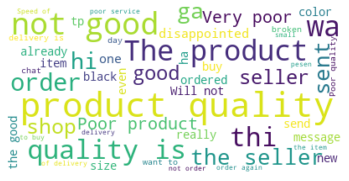


Word Cloud for Rating 2


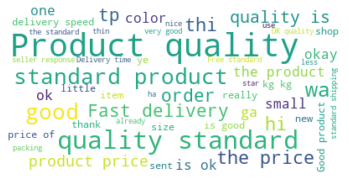


Word Cloud for Rating 3


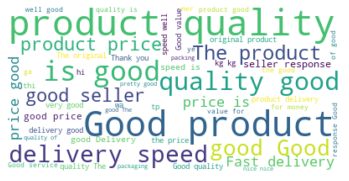


Word Cloud for Rating 4


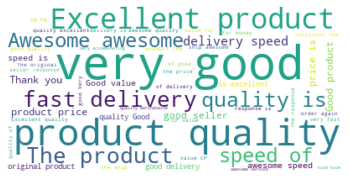


Word Cloud for Rating 5


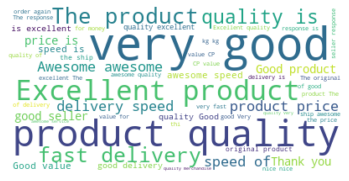

In [6]:
# Create stopword list:
stopwords = set(STOPWORDS)
#stopwords.update(["Subject","re","fw","fwd"])

print("Word Cloud for Rating 1")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_1)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Rating 2")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_2)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Rating 3")
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_3)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

print("\nWord Cloud for Rating 4")

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_4)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
     
print("\nWord Cloud for Rating 5")
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",max_words=50).generate(collapsed_heading_5)

# Display the generated image:
# the matplotlib way:1
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Preprocessing Pipeline

In [7]:
# Building Pipeline for raw text transformation
clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])

### Splitting data

In [8]:
# Remove records with blank values
train_1 = train.dropna()
train_1.shape , train.shape

((146811, 3), (146811, 3))

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train["review"], train["rating"],random_state = 42,
                                                   test_size = 0.10)
X_train.shape,X_test.shape,y_train.shape

((132129,), (14682,), (132129,))

In [10]:
model = clf.fit(X_train,y_train)

In [11]:
print("Accuracy of Naive Bayes Classifier is {}".format(model.score(X_test,y_test)))

Accuracy of Naive Bayes Classifier is 0.4256913227080779


In [12]:
y_predicted = model.predict(X_test)
y_predicted[0:10]

array([4, 5, 3, 3, 5, 4, 3, 5, 5, 3])

### Option 2: Random Forest

clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_jobs= -1)),
    ])

model = clf.fit(X_train,y_train)
print("Accuracy of Random Forest Classifier is {}".format(model.score(X_test,y_test)))

y_predicted = model.predict(X_test)
y_predicted[0:10]

### Option 3: SVM

from sklearn import svm

clf = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', svm.SVC()),
    ])

model = clf.fit(X_train,y_train)
print("Accuracy of Random Forest Classifier is {}".format(model.score(X_test,y_test)))

y_predicted = model.predict(X_test)
y_predicted[0:10]

### Predict for Subs

In [13]:
test = pd.read_csv('../input/student-shopee-code-league-sentiment-analysis/test.csv')
test.head()

,review_id,review
0,1,"Great danger, cool, motif and cantik2 jg model..."
1,2,One of the shades don't fit well
2,3,Very comfortable
3,4,Fast delivery. Product expiry is on Dec 2022. ...
4,5,it's sooooo cute! i like playing with the glit...


In [14]:
preds = model.predict(test['review'])
preds[0:10]

array([3, 1, 5, 4, 5, 3, 5, 4, 4, 4])

In [15]:
subs = pd.DataFrame(test['review_id'])
subs['rating'] = preds

In [16]:
subs

,review_id,rating
0,1,3
1,2,1
2,3,5
3,4,4
4,5,5
...,...,...
60422,60423,5
60423,60424,3
60424,60425,5
60425,60426,4


In [17]:
subs.to_csv('subs.csv', index=False)